In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.impute import SimpleImputer
# from sklearn_pandas import CategoricalImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression



# feature engineering 

In [246]:
df = pd.read_csv('../data/aqar.csv')

## dealing with nulls 

In [247]:
df.isnull().sum()

Unnamed: 0            0
user_id               0
id                    0
title                 0
price                 0
content              94
imgs                643
refresh               0
beds                  0
livings               2
wc                    0
area                175
street_width        210
age                 705
last_update           0
ketchen              17
ac                   19
furnished            45
location              0
path                  0
district              0
width              2100
length             2100
advertiser_type     240
create_time           0
review              399
profileImg         2746
UserName             93
iam_verified        146
DayOfRent             0
onMarket              0
timeBeforeRent        0
dtype: int64

<AxesSubplot:>

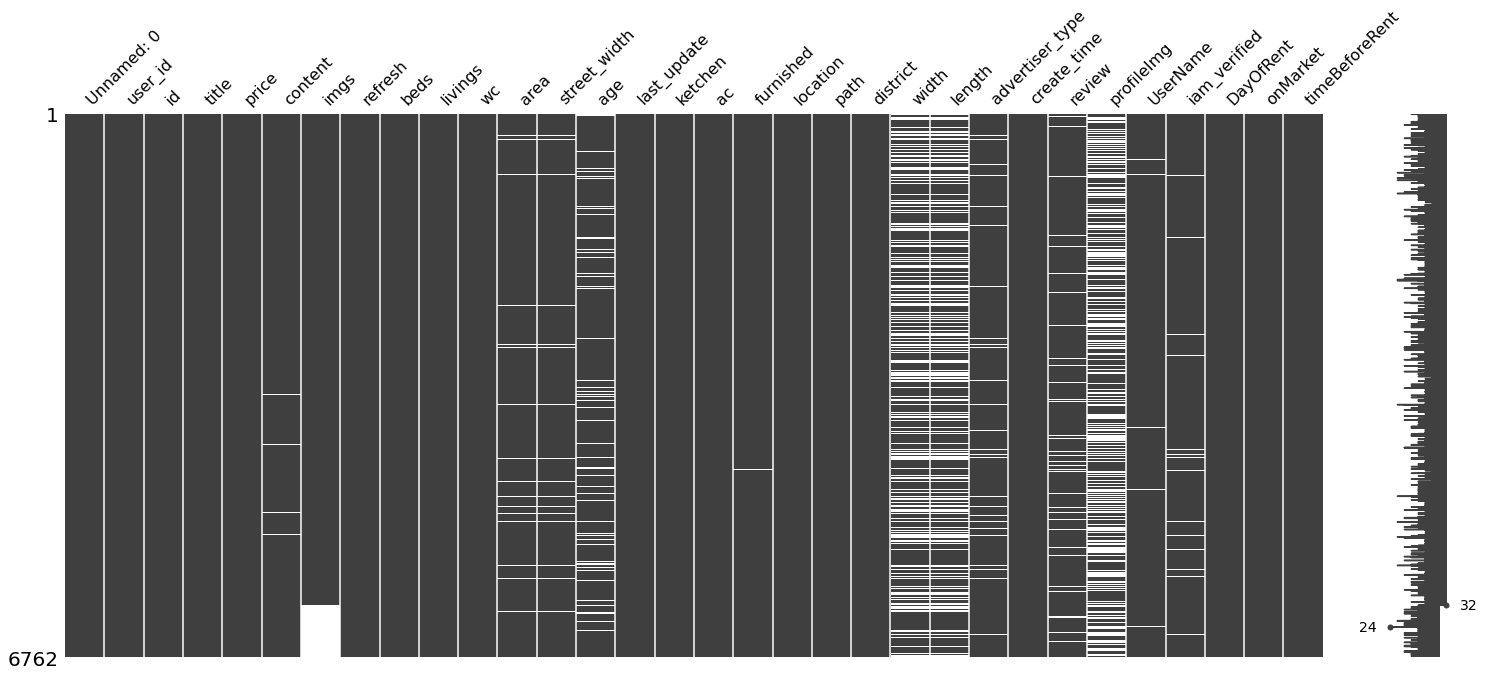

In [248]:
msno.matrix(df)


fill na with null becouse there it eather you have a profile image or not 

In [249]:
df['profileImg'].fillna(False , inplace=True)

i don't need the jpg link i just want to know if the dealer has img or not 

In [250]:
for index , row in df.iterrows()   :
    # print(row['profileImg'] )
     if (row['profileImg'] != False) :
        df['profileImg'][index] = True

/tmp/ipykernel_715/3280180632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [251]:
df['profileImg'].value_counts()

True     4016
False    2746
Name: profileImg, dtype: int64

for the content i don't care about the content it self sense there isn't a lot of time for NLP i want to see if how much did the dealer wrote so i fill the null with zero since  zero mean there isn't contet (i check this manually  ) 

In [13]:
df['content'].fillna('0' , inplace=True)

In [14]:
for index , row in df.iterrows():
    df['content'][index] = len(row['content'])

/tmp/ipykernel_715/3469686288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'][index] = len(row['content'])


In [15]:
df['iam_verified'].fillna(False , inplace=True)

In [16]:
df['iam_verified'].value_counts()

True     6604
False     158
Name: iam_verified, dtype: int64

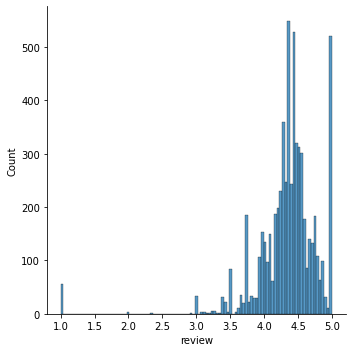

In [17]:
# df['review'].median()
sns.displot(df, x="review")

In [18]:
a = df['imgs'][0]
a

"['014958174_1659666836308.jpg', '014958178_1659666836077.jpg', '014958172_1659666837295.jpg']"

In [19]:
len(ast.literal_eval(a))

3

In [20]:
df['imgs'].fillna(0 , inplace = True)

In [21]:
df['imgs']

0       ['014958174_1659666836308.jpg', '014958178_165...
1       ['004966630_1659781493595.jpg', '004966636_165...
2       ['023243548_1658701693777.jpg', '023243549_165...
3       ['019065004_1659758037501.jpg', '019065000_165...
4       ['017415629_1657025837185.jpg', '017415620_165...
                              ...                        
6757                                                    0
6758                                                    0
6759                                                    0
6760                                                    0
6761                                                    0
Name: imgs, Length: 6762, dtype: object

In [22]:
for index , row in df.iterrows():
    if row['imgs'] == 0 :
        continue
    else:
        a= row['imgs']
        df['imgs'][index] = len(ast.literal_eval(a))

/tmp/ipykernel_715/4095940630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imgs'][index] = len(ast.literal_eval(a))


In [23]:
df['imgs'].value_counts()

8     880
0     643
7     539
6     505
5     482
9     433
10    397
4     386
1     322
12    318
11    316
3     269
13    213
14    170
15    154
16    145
2     129
18     90
17     86
19     59
21     36
20     36
22     32
23     23
24     21
26     21
30     15
27     14
25     10
28      9
29      7
31      1
37      1
Name: imgs, dtype: int64

In [24]:
a = df['location'][0]
a

"{'lat': 24.80093, 'lng': 46.89689, '__typename': 'Location'}"

In [25]:
print('\"')

"


In [26]:
a = a.replace('\''  , '\"' )

In [27]:
a = json.loads(a)
# a

In [28]:
a

{'lat': 24.80093, 'lng': 46.89689, '__typename': 'Location'}

In [29]:
a.get('lng')

46.89689

In [30]:
df['lat'] = 0
df['lng'] = 0

In [31]:
for index , row in df.iterrows() :
    a = row['location'] 
    a = a.replace('\''  , '\"' )
    a= json.loads(a)
    df['lat'][index] =  a.get('lat')
    df['lng'][index] =  a.get('lng')

/tmp/ipykernel_715/3726828350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'][index] =  a.get('lat')
/tmp/ipykernel_715/3726828350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lng'][index] =  a.get('lng')


In [32]:
df.drop(['location'] , axis = 1 , inplace=True)

In [33]:
df.drop(['width', 'length'] , axis=1 , inplace=True)

In [34]:
try:
    df.drop(['Unnamed: 0'] , axis=1 , inplace=True)
except:
    t=1

In [35]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'path', 'district', 'advertiser_type',
       'create_time', 'review', 'profileImg', 'UserName', 'iam_verified',
       'DayOfRent', 'onMarket', 'timeBeforeRent', 'lat', 'lng'],
      dtype='object')

In [36]:
df['UserName'].value_counts()

‏مؤسسة الحلم العربي              251
بوابه النهضه للخدمات العقاريه    163
مكتب عقاري                       108
عقار جديد                         88
مكتب عقاري مميز                   88
                                ... 
0555429978                         1
Sultanh                            1
hhs                                1
أبو سلطان                          1
المشاريع الناجحة                   1
Name: UserName, Length: 1472, dtype: int64

In [37]:
df['user_id'].value_counts() 

1992649    251
901785     162
1958104     96
2072661     88
940589      88
          ... 
1747849      1
393829       1
2590825      1
1019200      1
292698       1
Name: user_id, Length: 1777, dtype: int64

duplicates columns 

In [38]:
df.drop(['UserName'], axis=1 , inplace=True)

In [39]:
df.title.isna().sum()

0

In [40]:
for index , row in df.iterrows():
    if row['title'] == 0 :
        continue
    else:
        # a= 
        df['title'][index] = len(row['title'])

/tmp/ipykernel_715/1017281869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'][index] = len(row['title'])


In [41]:
df.title.min()

21

In [42]:
df.title.max()

107

In [43]:
df['refresh']==df['last_update']

0        True
1       False
2        True
3       False
4        True
        ...  
6757     True
6758     True
6759    False
6760     True
6761     True
Length: 6762, dtype: bool

In [44]:
df[df['refresh']==df['last_update']].value_counts().sum()

4461

In [45]:
df[df['refresh']!=df['last_update']].value_counts().sum()

929

In [46]:
df.drop('refresh', axis=1 , inplace=True)

In [47]:
df.advertiser_type.value_counts()

exclusive_marketer    2546
normal_marketer       1713
owner                 1656
agent                  607
Name: advertiser_type, dtype: int64

In [48]:
df.review.isna().sum()

399

In [49]:
df["review"].fillna(round(df.review.mean(), 2) , inplace=True)

In [50]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'beds', 'livings',
       'wc', 'area', 'street_width', 'age', 'last_update', 'ketchen', 'ac',
       'furnished', 'path', 'district', 'advertiser_type', 'create_time',
       'review', 'profileImg', 'iam_verified', 'DayOfRent', 'onMarket',
       'timeBeforeRent', 'lat', 'lng'],
      dtype='object')

<AxesSubplot:>

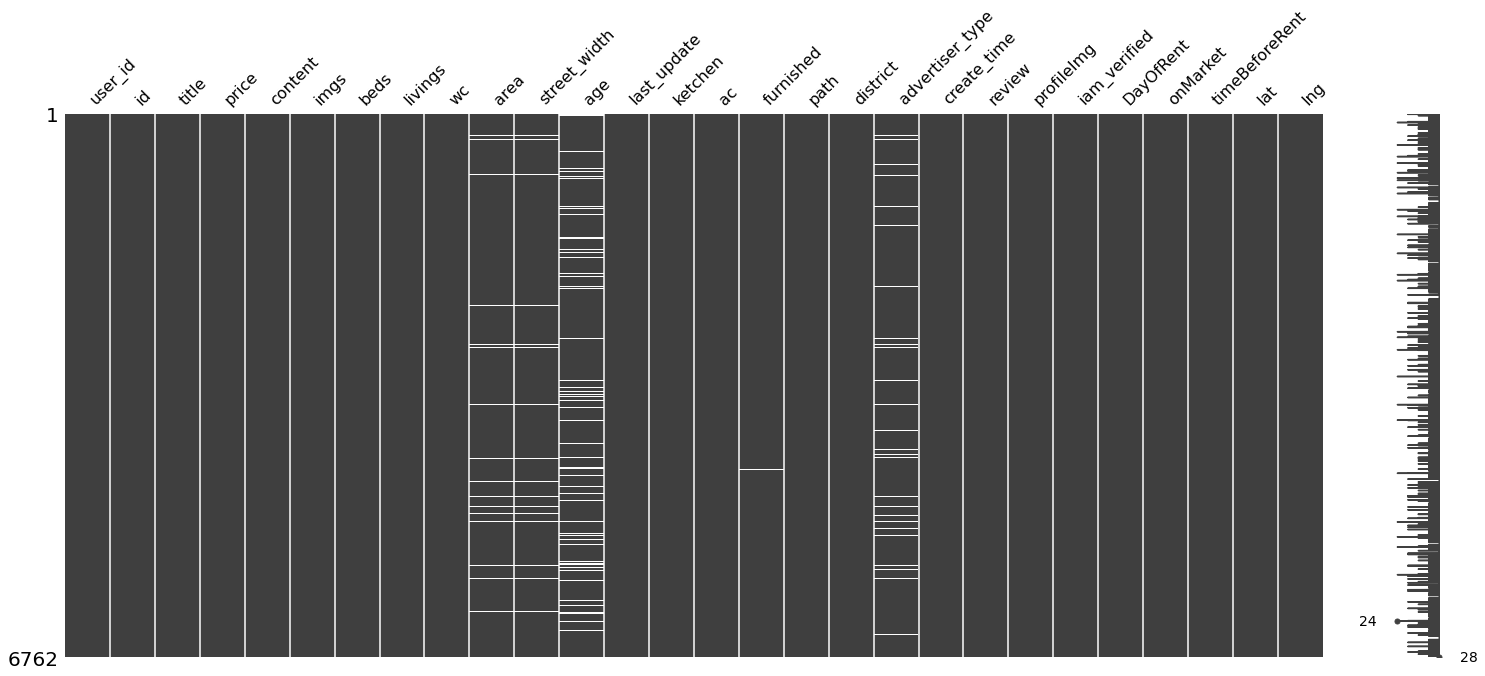

In [51]:
msno.matrix(df)


In [52]:
df = df.dropna(subset=['area' , 'street_width'])

In [53]:
df = df[df['area'] <= 1000]

In [54]:
df['furnished'].isna().sum()

23

In [55]:
df['furnished'].value_counts()

0.0    6005
1.0     503
Name: furnished, dtype: int64

In [56]:
df['furnished'].fillna(0 , inplace=True)

In [57]:
df['advertiser_type'].isna().sum()

168

In [58]:
df['advertiser_type']

0                    owner
1       exclusive_marketer
2          normal_marketer
3                    owner
4          normal_marketer
               ...        
6757    exclusive_marketer
6758    exclusive_marketer
6759                 owner
6760    exclusive_marketer
6761                 owner
Name: advertiser_type, Length: 6531, dtype: object

In [59]:
# from sklearn.impute import KNNImputer
# # I specify the nearest neighbor to be 3 
# fea_transformer = KNNImputer(n_neighbors=3)
# fea_transformer.fit_transform(df[["age"]])


In [60]:
df1 = df.copy()

In [61]:
df['age']

0        9.0
1       12.0
2        NaN
3        0.0
4        9.0
        ... 
6757     0.0
6758    25.0
6759     5.0
6760     1.0
6761     3.0
Name: age, Length: 6531, dtype: float64

In [62]:
# imputer = Pipeline([("imputer", SimpleImputer()),
#                     ("pandarizer",FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["age"])))])

In [63]:
# df['age'] = imputer.fit_transform(df[['age']])

In [64]:
# df.age.isna().sum()

In [65]:
# imp = SimpleImputer().fit_transform(df[["age"]])

In [66]:
# imputer = Pipeline([("imputer", SimpleImputer()),
#                     ("pandarizer",FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["age"])))])

In [67]:
# imputer.fit_transform(df[['age']]).shape

In [68]:
df['age'].shape

(6531,)

In [69]:
# imputer.fit_transform(df[['age']])['age'].shape

In [70]:
# df['age'][0] = imputer.fit_transform(df[['age']])['age'][0]

In [71]:
# for index  in range(len(df['age'])):
#     df['age'][index] = imputer.fit_transform(df[['age']])['age'][index]
#     # print(index)

In [72]:
df[ df['age'].isna()]['age']

2      NaN
14     NaN
18     NaN
20     NaN
24     NaN
        ..
6736   NaN
6738   NaN
6740   NaN
6746   NaN
6752   NaN
Name: age, Length: 665, dtype: float64

In [73]:
df['age'].isna().sum()

665

In [74]:
df['age'] = df['age'].interpolate( method='linear' )

In [75]:
df['age'].isna().sum()

0

<AxesSubplot:>

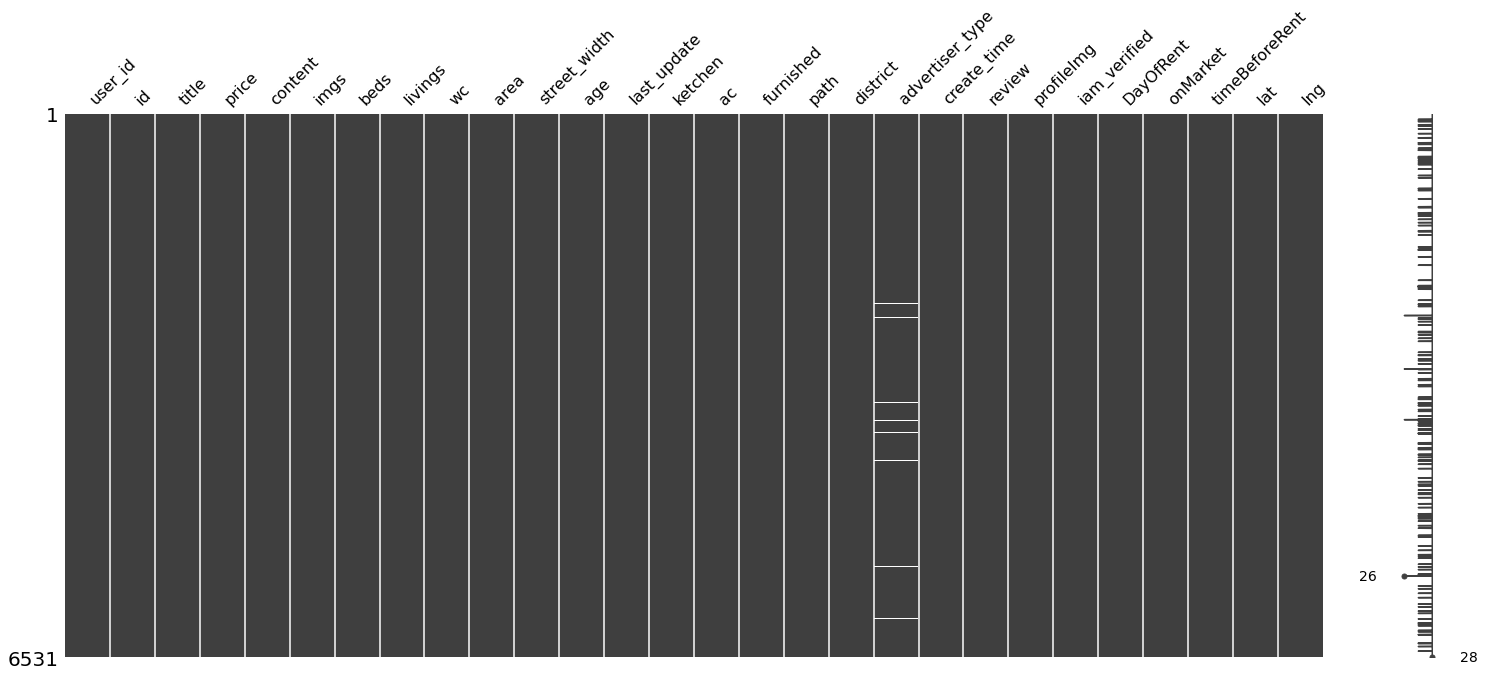

In [76]:
msno.matrix(df)


In [77]:
df['furnished']= df['furnished'].fillna(method='pad')

In [78]:
df['advertiser_type'].value_counts()

exclusive_marketer    2468
normal_marketer       1682
owner                 1614
agent                  599
Name: advertiser_type, dtype: int64

In [79]:
list(df[df['advertiser_type'] == 'normal_marketer'    ]['path'])[23]

'/شقق-للإيجار/الرياض/شمال-الرياض/حي-الملقا/شارع-محمد-بن-عبدالعزيز-الدغيثر-حي-الملقا-الرياض-الرياض-4595552'

In [80]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'beds', 'livings',
       'wc', 'area', 'street_width', 'age', 'last_update', 'ketchen', 'ac',
       'furnished', 'path', 'district', 'advertiser_type', 'create_time',
       'review', 'profileImg', 'iam_verified', 'DayOfRent', 'onMarket',
       'timeBeforeRent', 'lat', 'lng'],
      dtype='object')

In [81]:
df['advertiser_type']= df['advertiser_type'].fillna(method='pad')

In [82]:
df.isna().sum()

user_id            0
id                 0
title              0
price              0
content            0
imgs               0
beds               0
livings            1
wc                 0
area               0
street_width       0
age                0
last_update        0
ketchen            5
ac                 6
furnished          0
path               0
district           0
advertiser_type    0
create_time        0
review             0
profileImg         0
iam_verified       0
DayOfRent          0
onMarket           0
timeBeforeRent     0
lat                0
lng                0
dtype: int64

In [83]:
df= df.fillna(method='pad')

In [84]:
df.loc[0]

user_id                                                      1495817
id                                                           4596035
title                                                             57
price                                                          20000
content                                                           11
imgs                                                               3
beds                                                               3
livings                                                          0.0
wc                                                                 2
area                                                           225.0
street_width                                                    15.0
age                                                              9.0
last_update                               ['2022-08-06', '12:22:15']
ketchen                                                          1.0
ac                                

In [85]:
a = df['path'][0].split('/')[3] 
a.split('-')[0]

'شرق'

In [86]:
df['zone'] = '0'

In [87]:
for index , row in df.iterrows():
    a = row['path'].split('/')[3]
    df['zone'][index] = a.split('-')[0]


/tmp/ipykernel_715/233973366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zone'][index] = a.split('-')[0]


In [88]:
df['zone'].value_counts()

شمال    3524
شرق     2256
غرب      521
وسط      123
جنوب     107
Name: zone, dtype: int64

In [89]:
df.drop('path' , axis=1 , inplace=True)

In [90]:
df.loc[1]

user_id                                496663
id                                    4599813
title                                      59
price                                   25000
content                                   193
imgs                                       12
beds                                        3
livings                                   1.0
wc                                          2
area                                    130.0
street_width                             30.0
age                                      12.0
last_update        ['2022-08-06', '10:27:56']
ketchen                                   1.0
ac                                        0.0
furnished                                 0.0
district                           حي الفيحاء
advertiser_type            exclusive_marketer
create_time        ['2022-08-06', '10:27:56']
review                                   4.33
profileImg                               True
iam_verified                      

In [91]:
df['zone'].value_counts()

شمال    3524
شرق     2256
غرب      521
وسط      123
جنوب     107
Name: zone, dtype: int64

In [92]:
df.loc[df["zone"] == "شمال", "zone"] = 1
df.loc[df["zone"] == "شرق", "zone"] = 2
df.loc[df["zone"] == "غرب", "zone"] = 3
df.loc[df["zone"] == "وسط", "zone"] = 4
df.loc[df["zone"] == "جنوب", "zone"] = 5

In [93]:
df['zone'].value_counts()

1    3524
2    2256
3     521
4     123
5     107
Name: zone, dtype: int64

In [94]:
label_encoder = preprocessing.LabelEncoder()


In [95]:
df['district'] = label_encoder.fit_transform(df['district'])

In [96]:
df['district'].value_counts()

81     796
44     595
70     564
95     435
94     328
      ... 
54       1
18       1
106      1
60       1
71       1
Name: district, Length: 127, dtype: int64

In [97]:
df['advertiser_type'].isna().sum()

0

In [98]:
# enc=OneHotEncoder()

In [99]:
# enc.fit_transform(df[['advertiser_type']])

In [100]:
# enc_data=pd.DataFrame(enc.fit_transform(df[['advertiser_type']]).toarray())

In [101]:
# enc_data.isna().sum()

In [102]:
New_df = df.copy()

In [103]:
# df.join(enc_data).reset_index()


In [104]:
New_df = pd.get_dummies(df, columns = ['advertiser_type'])
# New_df.isna().sum()

In [105]:
New_df

,user_id,id,title,price,content,imgs,beds,livings,wc,area,...,DayOfRent,onMarket,timeBeforeRent,lat,lng,zone,advertiser_type_agent,advertiser_type_exclusive_marketer,advertiser_type_normal_marketer,advertiser_type_owner
0,1495817,4596035,57,20000,11,3,3,0.0,2,225.0,...,0,13,0,24.800930,46.896890,2,0,0,0,1
1,496663,4599813,59,25000,193,12,3,1.0,2,130.0,...,5,5,5,24.687521,46.807558,2,0,1,0,0
2,2412431,4554519,71,22000,140,8,3,1.0,2,200.0,...,2,15,15,24.921463,46.806270,2,0,0,1,0
3,1906500,4120004,63,38000,128,5,1,1.0,1,120.0,...,0,161,0,24.780059,46.630602,1,0,0,0,1
4,1741562,4498954,70,25000,94,10,1,1.0,1,60.0,...,0,44,0,24.771793,46.698757,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,1958104,4538503,64,60000,335,0,3,1.0,2,180.0,...,0,29,0,24.866976,46.649873,1,0,1,0,0
6758,395654,3130523,56,9800,133,0,2,1.0,1,90.0,...,0,489,0,24.625145,46.735970,4,0,1,0,0
6759,292698,4453217,55,50000,166,0,3,1.0,2,120.0,...,0,58,0,24.807284,46.767262,2,0,0,0,1
6760,120924,4586116,62,40000,444,0,2,2.0,2,200.0,...,0,16,0,24.870188,46.650692,1,0,1,0,0


In [106]:
# df.loc[df[0].isna()]['advertiser_type']

In [107]:
New_df.isna().sum()

user_id                               0
id                                    0
title                                 0
price                                 0
content                               0
imgs                                  0
beds                                  0
livings                               0
wc                                    0
area                                  0
street_width                          0
age                                   0
last_update                           0
ketchen                               0
ac                                    0
furnished                             0
district                              0
create_time                           0
review                                0
profileImg                            0
iam_verified                          0
DayOfRent                             0
onMarket                              0
timeBeforeRent                        0
lat                                   0


In [108]:
# New_df.drop('advertiser_type' , axis=1  , inplace=True)

In [109]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6531 entries, 0 to 6761
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   user_id                             6531 non-null   int64  
 1   id                                  6531 non-null   int64  
 2   title                               6531 non-null   int64  
 3   price                               6531 non-null   int64  
 4   content                             6531 non-null   int64  
 5   imgs                                6531 non-null   int64  
 6   beds                                6531 non-null   int64  
 7   livings                             6531 non-null   float64
 8   wc                                  6531 non-null   int64  
 9   area                                6531 non-null   float64
 10  street_width                        6531 non-null   float64
 11  age                                 6531 no

In [110]:
# df1['zone'].value_counts()

In [111]:
# df['title'] =df['title'].astype('int64' )
# df['content'] =df['content'].astype('int64' )
# df['imgs'] =df['imgs'].astype('int64' )

In [112]:

New_df['createYEAR'] = 0
New_df['createMONTH'] = 0
New_df['createDAY']= 0
New_df['lUpdateYEAR']= 0
New_df['lUpdateMONTH'] = 0
New_df['lUpdateDAY'] = 0
New_df['createDAY']= 0 

In [113]:
 df['create_time'][index][7:9]

'02'

In [114]:
 df['create_time'][index][7:9]

'02'

In [115]:
df['create_time'][110][10:12]

'20'

In [116]:
for index , row in New_df.iterrows():
    New_df['createYEAR'][index] = df['create_time'][index][7:9]
    New_df['createDAY'][index]  = df['create_time'][index][10:12]
    New_df['createMONTH'][index] =  df['create_time'][index][7:9]

/tmp/ipykernel_715/4155847202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['createYEAR'][index] = df['create_time'][index][7:9]
/tmp/ipykernel_715/4155847202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['createDAY'][index]  = df['create_time'][index][10:12]
/tmp/ipykernel_715/4155847202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['createMONTH'][index] =  df['create_time'][index][7:9]


In [117]:
# New_df['create_time'] = New_df['create_time'].astype('datetime64' )

In [118]:
New_df['zone'] = New_df['zone'].astype('int64' )


In [119]:
for index , row in New_df.iterrows():
    New_df['lUpdateYEAR'][index] = df['last_update'][index][7:9]
    New_df['lUpdateDAY'][index]  = df['last_update'][index][10:12]
    New_df['lUpdateMONTH'][index] =  df['last_update'][index][7:9]

/tmp/ipykernel_715/2568141570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['lUpdateYEAR'][index] = df['last_update'][index][7:9]
/tmp/ipykernel_715/2568141570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['lUpdateDAY'][index]  = df['last_update'][index][10:12]
/tmp/ipykernel_715/2568141570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['lUpdateMONTH'][index] =  df['last_update'][index][7:9]


In [120]:

New_df['createYEAR'] = New_df['createYEAR'].astype('int64')
New_df['createMONTH'] = New_df['createMONTH'].astype('int64')
New_df['createDAY']=  New_df['createDAY'].astype('int64')
New_df['lUpdateYEAR']=  New_df['lUpdateYEAR'].astype('int64')
New_df['lUpdateMONTH'] = New_df['lUpdateMONTH'].astype('int64')
New_df['lUpdateDAY'] = New_df['lUpdateDAY'].astype('int64')
New_df['createDAY']=   New_df['createDAY'].astype('int64')

In [121]:
New_df.drop(['create_time' , 'last_update'] ,axis=1 , inplace=True)

In [122]:
New_df

,user_id,id,title,price,content,imgs,beds,livings,wc,area,...,advertiser_type_agent,advertiser_type_exclusive_marketer,advertiser_type_normal_marketer,advertiser_type_owner,createYEAR,createMONTH,createDAY,lUpdateYEAR,lUpdateMONTH,lUpdateDAY
0,1495817,4596035,57,20000,11,3,3,0.0,2,225.0,...,0,0,0,1,8,8,5,8,8,6
1,496663,4599813,59,25000,193,12,3,1.0,2,130.0,...,0,1,0,0,8,8,6,8,8,6
2,2412431,4554519,71,22000,140,8,3,1.0,2,200.0,...,0,0,1,0,7,7,24,8,8,6
3,1906500,4120004,63,38000,128,5,1,1.0,1,120.0,...,0,0,0,1,3,3,10,8,8,6
4,1741562,4498954,70,25000,94,10,1,1.0,1,60.0,...,0,0,1,0,7,7,5,8,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,1958104,4538503,64,60000,335,0,3,1.0,2,180.0,...,0,1,0,0,7,7,20,8,8,5
6758,395654,3130523,56,9800,133,0,2,1.0,1,90.0,...,0,1,0,0,4,4,16,7,7,30
6759,292698,4453217,55,50000,166,0,3,1.0,2,120.0,...,0,0,0,1,6,6,21,8,8,2
6760,120924,4586116,62,40000,444,0,2,2.0,2,200.0,...,0,1,0,0,8,8,2,8,8,5


In [123]:
New_df.isna().sum()


user_id                               0
id                                    0
title                                 0
price                                 0
content                               0
imgs                                  0
beds                                  0
livings                               0
wc                                    0
area                                  0
street_width                          0
age                                   0
ketchen                               0
ac                                    0
furnished                             0
district                              0
review                                0
profileImg                            0
iam_verified                          0
DayOfRent                             0
onMarket                              0
timeBeforeRent                        0
lat                                   0
lng                                   0
zone                                  0


In [124]:
New_df['isRent'] = 0
New_df['isRent'] = np.where(  New_df['DayOfRent'] == 0 ,  False , True)

In [125]:
New_df['DayOfRent']

0       0
1       5
2       2
3       0
4       0
       ..
6757    0
6758    0
6759    0
6760    0
6761    0
Name: DayOfRent, Length: 6531, dtype: int64

In [126]:
New_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6531 entries, 0 to 6761
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   user_id                             6531 non-null   int64  
 1   id                                  6531 non-null   int64  
 2   title                               6531 non-null   int64  
 3   price                               6531 non-null   int64  
 4   content                             6531 non-null   int64  
 5   imgs                                6531 non-null   int64  
 6   beds                                6531 non-null   int64  
 7   livings                             6531 non-null   float64
 8   wc                                  6531 non-null   int64  
 9   area                                6531 non-null   float64
 10  street_width                        6531 non-null   float64
 11  age                                 6531 no

In [127]:
nzv = VarianceThreshold(threshold=0.1)

In [128]:
yj = PowerTransformer(method="yeo-johnson")
# X_norm = ColumnTransformer([("norm", yj, selector(dtype_include="number"))])

In [129]:
scaler = StandardScaler()

# standardize all numeric features
# std = ColumnTransformer([("norm", scaler, selector(dtype_include="number"))])

In [130]:
encoder = OneHotEncoder(handle_unknown="ignore")


In [178]:
pca = PCA(n_components=5)


In [201]:
preprocessor = ColumnTransformer(
  remainder="passthrough",
  transformers=[
  ("nzv_encode", nzv, selector(dtype_include="number")),
  ("norm", yj, selector(dtype_include="number")),
  ("std_encode", scaler, selector(dtype_include="number")),
  # ("pca_encode", pca, selector(dtype_include="number")),
  ("one-hot", encoder, selector(dtype_include="object")),
  ])

In [132]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('nzv_encode', VarianceThreshold(threshold=0.1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe64b6fb0a0>),
                                ('norm', PowerTransformer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe64b6fb040>),
                                ('std_encode', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe64b6f9c00>),
                                ('one-hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe64b6f9780>)])

In [133]:
# New_df.shape

In [193]:
X = New_df.drop(['isRent' , 'DayOfRent' , 'timeBeforeRent' , 'onMarket' , 'id'] , axis=1)
y = New_df['isRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr = LogisticRegression(max_iter=500)

# training & prediction


In [218]:
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("lr", lr),
])

In [219]:
model_pipeline.fit(X_train , y_train)

/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3211: RuntimeWarning: overflow encountered in power


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b4c71f0>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63ff706d0>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50f160>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50d510>)])),
                ('lr', LogisticRegression(max_iter=500))])

In [220]:
model_pipeline.score(X_test , y_test)

0.6163265306122448

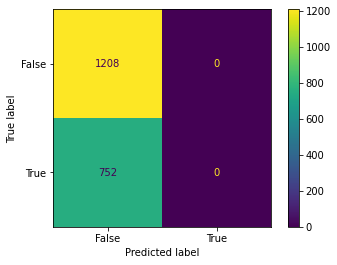

In [221]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=model_pipeline.classes_
  )
  
disp.plot()

In [137]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# evaluation
print('Confusion Matrix :\n', confusion_matrix(model_pipeline, X_train))
print()
print('Classification Report :\n', classification_report(model_pipeline,X_train  ))

TypeError: Expected sequence or array-like, got <class 'sklearn.pipeline.Pipeline'>

In [143]:
# Helper packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence

In [ ]:
# Center and scale (i.e., standardize) all numeric features

encoder = OneHotEncoder(handle_unknown="ignore")
X_train_std = encoder.fit_transform(X_train)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# create KNN model object
knn = KNeighborsClassifier(n_neighbors=5)

# define loss function
loss = 'roc_auc'

# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# fit model with 5-fold CV
results = cross_val_score(knn, X_train_std, y_train, cv=kfold, scoring=loss)


np.round(results, 3)

array([0.708, 0.683, 0.693, 0.676, 0.687])

In [ ]:
knn = KNeighborsClassifier()

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(1, 300, 4)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train_std, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

0.6988308039054366

In [ ]:
optimal_k = results.best_estimator_.get_params().get('n_neighbors')
optimal_k

13

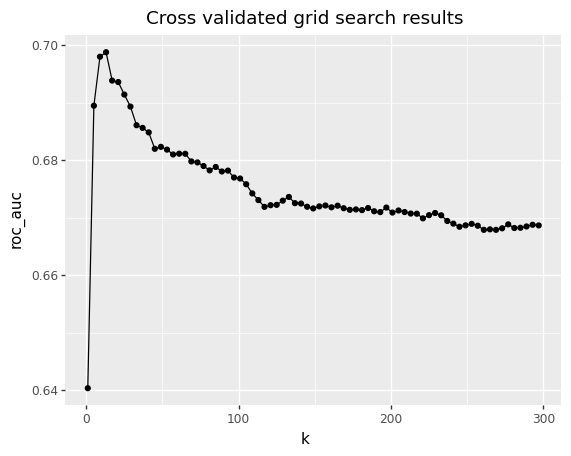

<ggplot: (8781885149797)>

In [ ]:
all_errors = pd.DataFrame({
  'k': range(1, 300, 4),
  'roc_auc': results.cv_results_['mean_test_score']
  })

(ggplot(all_errors, aes(x='k', y='roc_auc'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.


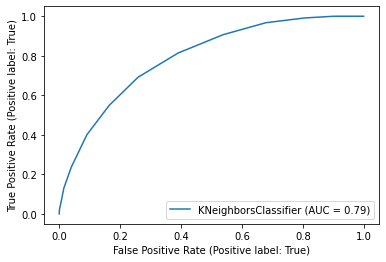

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best_fit = knn_best.fit(X_train_std, y_train)

# create ROC curve
plot_roc_curve(knn_best_fit, X_train_std, y_train)  
plt.show()

In [ ]:
predictions = knn_best_fit.predict(X_train_std)
cm = confusion_matrix(y_train, predictions)
cm

array([[2589,  508],
       [ 812,  989]])

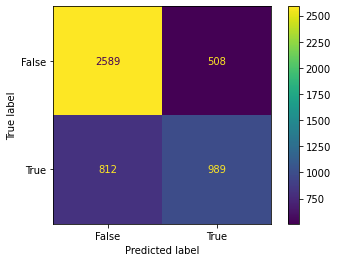

In [ ]:
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=knn_best_fit.classes_
  )
  
disp.plot()

In [ ]:
print(classification_report(y_train, predictions, target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.76      0.84      0.80      3097
         pos       0.66      0.55      0.60      1801

    accuracy                           0.73      4898
   macro avg       0.71      0.69      0.70      4898
weighted avg       0.72      0.73      0.72      4898



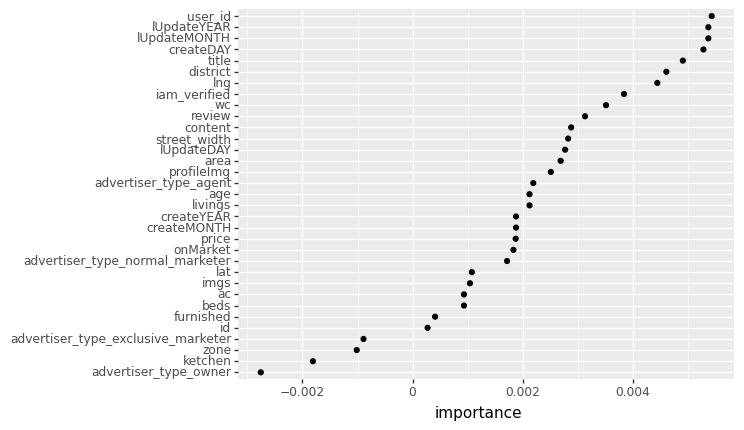

<ggplot: (8781885224507)>

In [ ]:
r = permutation_importance(
  knn_best_fit, 
  X_train_std, 
  y_train,
  n_repeats=30,
  random_state=0
  )
  
vip = pd.DataFrame({'feature': X_train.columns.values,
                    'importance': r.importances_mean})
                    
(ggplot(vip, aes('importance', 'reorder(feature, importance)'))
  + geom_point()
  + labs(y=None))

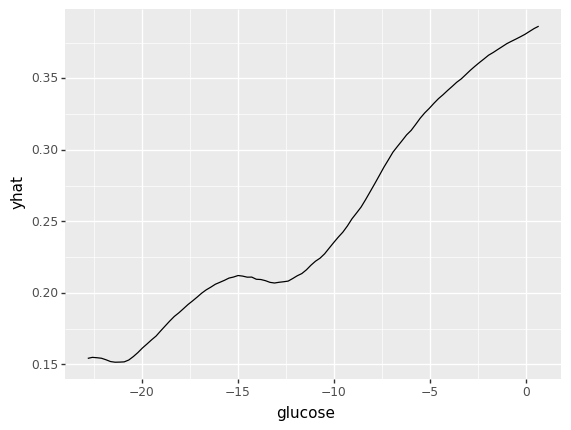

<ggplot: (8781885695610)>

In [ ]:
pd_results = partial_dependence(
  knn_best_fit, X_train_std, features=1, kind='average',
  percentiles=(0, 1)
) 
  
pd_output = pd.DataFrame({'glucose': pd_results['values'][0],
                          'yhat': pd_results['average'][0]})
                          
(ggplot(pd_output, aes('glucose', 'yhat'))
  + geom_line())

In [169]:
# Helper packages
import numpy as np
import pandas as pd
from plotnine import *
from scipy.stats import uniform
from scipy.stats import randint

# Modeling packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import partial_dependence
from sklearn.pipeline import Pipeline

In [210]:
rf_mod = RandomForestClassifier()

# create modeling pipeline
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("rf_mod", rf_mod),
])

In [211]:
X = New_df.drop(['isRent' , 'DayOfRent' , 'timeBeforeRent'] , axis=1)
y = New_df['isRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=123)

In [222]:
model_pipeline.fit(X_train , y_train)

/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3211: RuntimeWarning: overflow encountered in power


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b4c71f0>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63ff706d0>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50f160>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50d510>)])),
                ('lr', LogisticRegression(max_iter=500))])

In [223]:
model_pipeline.score(X_test , y_test)

0.6163265306122448

In [224]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))

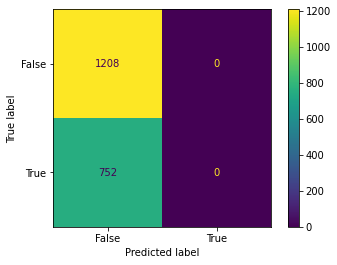

In [225]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=model_pipeline.classes_
  )
  
disp.plot()

In [226]:
print(classification_report(y_test,  model_pipeline.predict(X_test), target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.62      1.00      0.76      1208
         pos       0.00      0.00      0.00       752

    accuracy                           0.62      1960
   macro avg       0.31      0.50      0.38      1960
weighted avg       0.38      0.62      0.47      1960



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


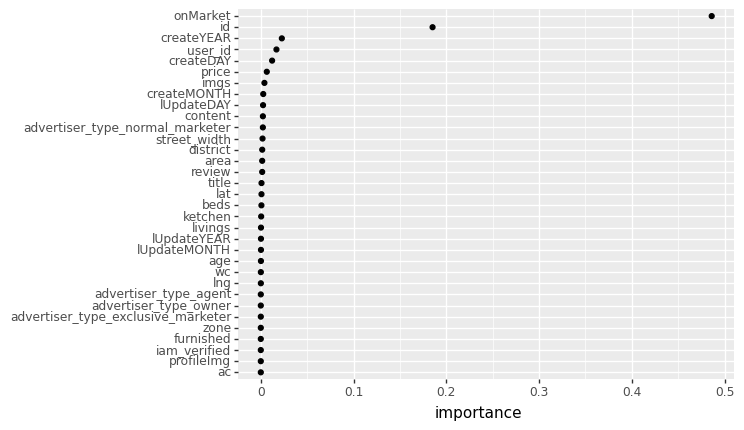

<ggplot: (8789178195395)>

In [217]:
r = permutation_importance(
  model_pipeline, 
  X_train, 
  y_train,
  n_repeats=30,
  random_state=0
  )
  
vip = pd.DataFrame({'feature': X_train.columns.values,
                    'importance': r.importances_mean})
                    
(ggplot(vip, aes('importance', 'reorder(feature, importance)'))
  + geom_point()
  + labs(y=None))

In [149]:
from sklearn.tree import DecisionTreeClassifier


In [162]:
rf_mod = DecisionTreeClassifier()

In [203]:
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("rf_mod", rf_mod),
])

In [204]:
model_pipeline.fit(X_train , y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3211: RuntimeWarning: overflow encountered in power
/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b4c71f0>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63ff706d0>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50f160>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50d510>)])),
                ('rf_mod', RandomForestClassifier())])

In [205]:
model_pipeline.score(X_test , y_test)

0.7501530924678506

In [206]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))

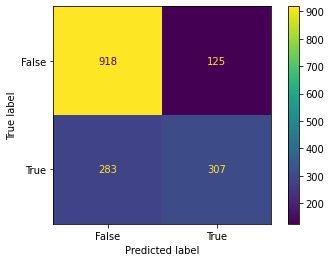

In [207]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=model_pipeline.classes_
  )
  
disp.plot()

In [208]:
print(classification_report(y_test,  model_pipeline.predict(X_test), target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.76      0.88      0.82      1043
         pos       0.71      0.52      0.60       590

    accuracy                           0.75      1633
   macro avg       0.74      0.70      0.71      1633
weighted avg       0.74      0.75      0.74      1633



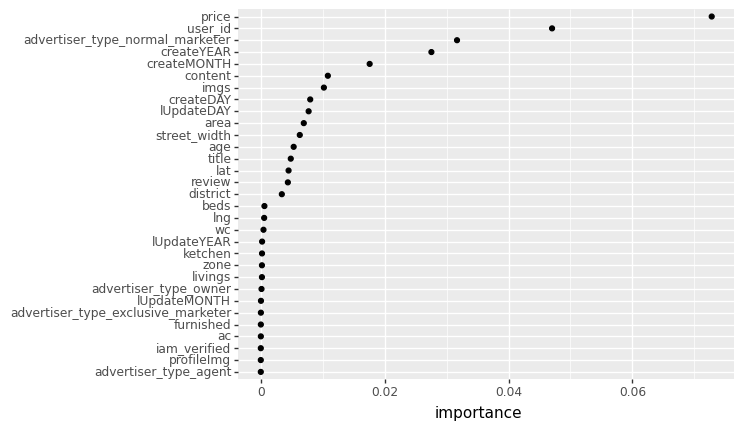

<ggplot: (8789180505854)>

In [209]:
r = permutation_importance(
  model_pipeline, 
  X_train, 
  y_train,
  n_repeats=30,
  random_state=0
  )
  
vip = pd.DataFrame({'feature': X_train.columns.values,
                    'importance': r.importances_mean})
                    
(ggplot(vip, aes('importance', 'reorder(feature, importance)'))
  + geom_point()
  + labs(y=None))

In [227]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [228]:
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("clf_gini", clf_gini),
])

In [229]:
model_pipeline.fit(X_train , y_train)

/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3211: RuntimeWarning: overflow encountered in power


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b4c71f0>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63ff706d0>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50f160>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50d510>)])),
                ('clf_gini',
                 DecisionTreeClassifier(max_depth=3, random_state=0))])

In [231]:
y_pred_gini = model_pipeline.predict(X_test)

In [232]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7592


In [233]:
y_pred_train_gini = model_pipeline.predict(X_train)

y_pred_train_gini

array([False, False, False, ..., False, False, False])

In [234]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7786


In [236]:
print('Training set score: {:.4f}'.format(model_pipeline.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_pipeline.score(X_test, y_test)))

Training set score: 0.7786
Test set score: 0.7592


no sign of overfitting.